# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# dataset_train.iloc[:,1].values returns to vector but we need numpy array therefor [:,1:2]
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
# Normalization recommend : RNN with sigmoid function as a activation function for output layer
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
# (t-60) (t-59) ... (t-1) t
#   |      |          |   |
#  input input  ... input |_prediction
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
# Convert to numpy arrat
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
# Add new dimension : if needed to add more then one input features (NOTE: this implementation only have one features)
# input : A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
# Units = 50 : number of LSTM cels (50 taken due to complexity of prediction)
# return_sequences = true : true for add another LSTN layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# to avoid overfitting
# Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.
# 0.2 or 20% dropout rate
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
# return_sequences = false : false this is the last LSTM layer
# or regressor.add(LSTM(units = 50)) default return_sequences value is false
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
# optimizer = RMSprop : Recommend for RNN
# But we use Adam for this example
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 74s 168ms/step - loss: 0.0931
Epoch 2/100
38/38 [==============================] - 7s 190ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0061
Epoch 7/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0043
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# iloc didnt used therefor need to change the format
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# 60 + 20 = 80
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

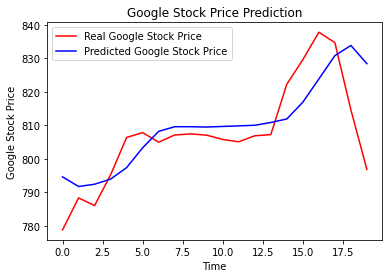

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()